## Install libraries

In [170]:
import numpy
from pandas import read_csv
import pandas as pd
from numpy import arange
import operator
import pandas as pd
import numpy as np
import operator
import sys
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import seaborn as sns
from gensim.models.keyedvectors import KeyedVectors
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import plotly
import plotly.express as px
from pandas import set_option
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

## Load dataset

In [171]:
esg = read_csv('../notebooks/content/esg.csv', )
esg.columns
# split into input and output variables
#X = dataset[:,0:13]
#Y = dataset[:,13]

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings', 'ESG-2016', 'ESG-2017',
       'ESG-2018', 'ESG-2019', 'ESG-2020', 'Average ESG', 'Risk Level',
       'ESG Rating', 'Symbol.1', 'Name.1', 'Unnamed: 24'],
      dtype='object')

In [172]:
columns = ['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share', '52_week_low', '52_week_high', 'market_cap','esg_rating']
#columns = ['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share', '52_week_low', '52_week_high', 'market_cap', 'esg_rating']
#esg = esg[['Symbol', 'Name', 'Sector','Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'ESG Rating']]
esg = esg[['Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'ESG Rating']]
esg.columns = columns
esg.dropna(inplace=True)
esg.shape

#target = esg.pop('esg_rating')

(461, 8)

In [107]:
def sort_dict(mydict, reversed=False):
  return sorted(mydict.items(), key=operator.itemgetter(0), reverse=reversed)

In [173]:
esg.head()

,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,esg_rating
0,222.89,24.31,2.33,7.92,259.77,175.49,1.39e+11,34.9
1,60.24,27.76,1.15,1.70,68.39,48.92,1.08e+10,32.6
2,56.27,22.51,1.91,0.26,64.60,42.28,1.02e+11,29.8
3,108.48,19.41,2.50,3.29,125.86,60.05,1.81e+11,29.1
4,150.51,25.47,1.71,5.44,162.60,114.82,9.88e+10,11.3


In [109]:
#labels = esg['sector'].values
#labels = list(set(labels))
#labels

In [111]:
print(esg.dtypes)

price                 float64
price_per_earnings    float64
dividend_yield        float64
earnings_per_share    float64
52_week_low           float64
52_week_high          float64
market_cap            float64
esg_rating            float64
dtype: object


In [112]:
set_option('precision', 1)
print(esg.describe())

        price  price_per_earnings  dividend_yield  earnings_per_share  \
count   461.0               461.0           461.0               461.0   
mean    101.7                25.4             1.9                 3.8   
std     106.9                42.8             1.4                 5.3   
min       2.8              -251.5             0.0               -24.6   
25%      47.4                15.5             0.8                 1.6   
50%      74.7                19.7             1.8                 2.9   
75%     118.4                25.9             2.8                 5.2   
max    1350.5               520.1             7.7                44.1   

       52_week_low  52_week_high  market_cap  esg_rating  
count        461.0         461.0     4.6e+02       461.0  
mean         120.1          81.6     4.9e+10        23.9  
std          123.9          77.4     8.8e+10        13.1  
min            6.6           2.8     2.6e+09         8.7  
25%           58.0          40.0     1.3e+10   

In [113]:
# correlation
set_option('precision', 2)
print(esg.corr(method='pearson'))

                    price  price_per_earnings  dividend_yield  \
price                1.00            2.44e-01           -0.27   
price_per_earnings   0.24            1.00e+00           -0.19   
dividend_yield      -0.27           -1.89e-01            1.00   
earnings_per_share   0.53           -3.79e-03           -0.08   
52_week_low          0.99            2.31e-01           -0.28   
52_week_high         0.98            1.93e-01           -0.24   
market_cap           0.41            1.32e-01           -0.01   
esg_rating          -0.04           -1.59e-02            0.02   

                    earnings_per_share  52_week_low  52_week_high  market_cap  \
price                         5.32e-01         0.99          0.98        0.41   
price_per_earnings           -3.79e-03         0.23          0.19        0.13   
dividend_yield               -7.92e-02        -0.28         -0.24       -0.01   
earnings_per_share            1.00e+00         0.53          0.56        0.15   
52_week_l

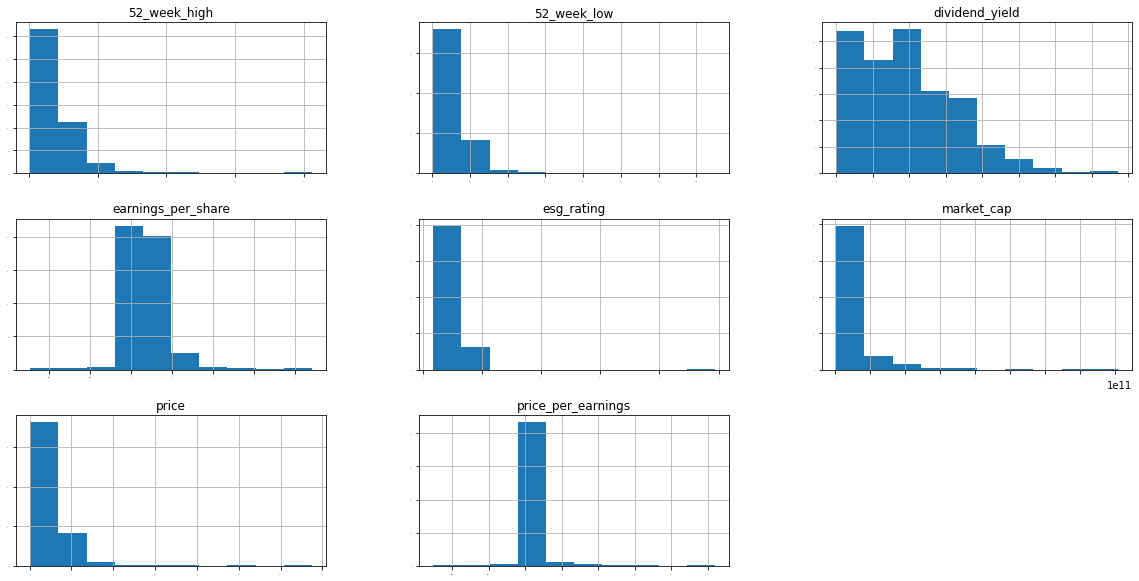

In [174]:
set_printoptions(precision=3)
esg.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

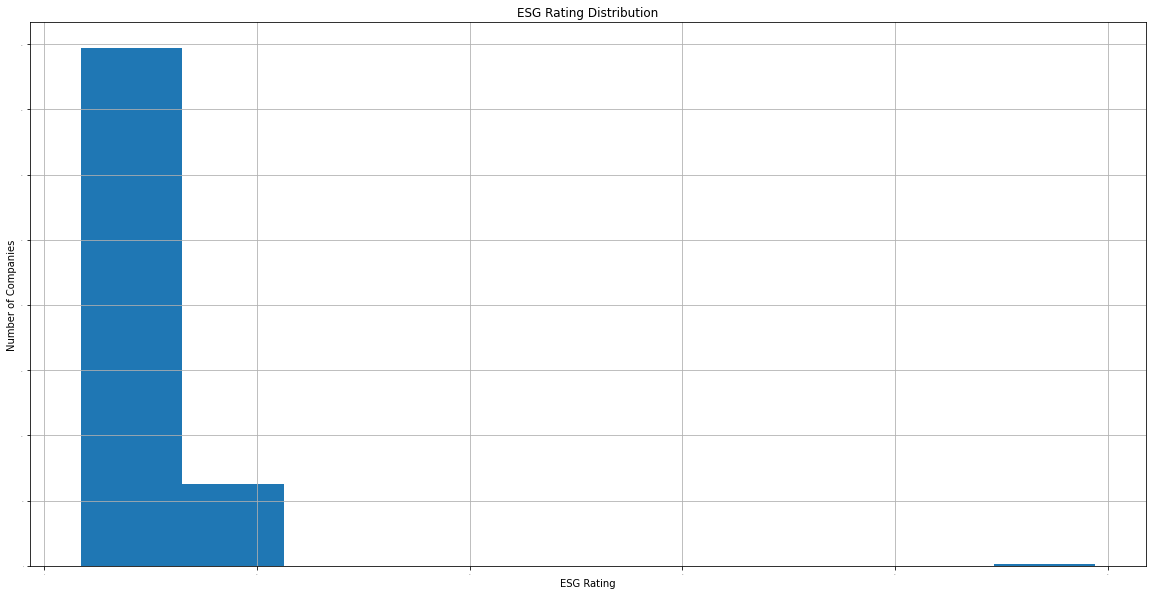

In [175]:
plt.rc('figure', figsize=(20,10))
esg['esg_rating'].hist(xlabelsize=1, ylabelsize=1)
pyplot.title('ESG Rating Distribution')
pyplot.xlabel('ESG Rating')
pyplot.ylabel('Number of Companies')
pyplot.show()

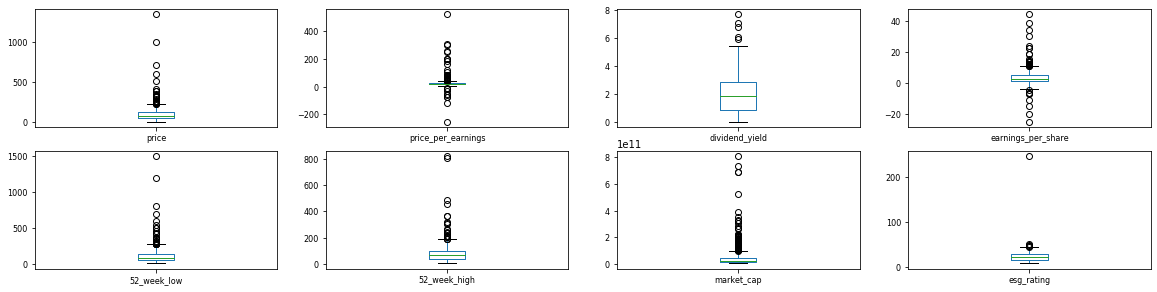

In [176]:
esg.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
pyplot.show()

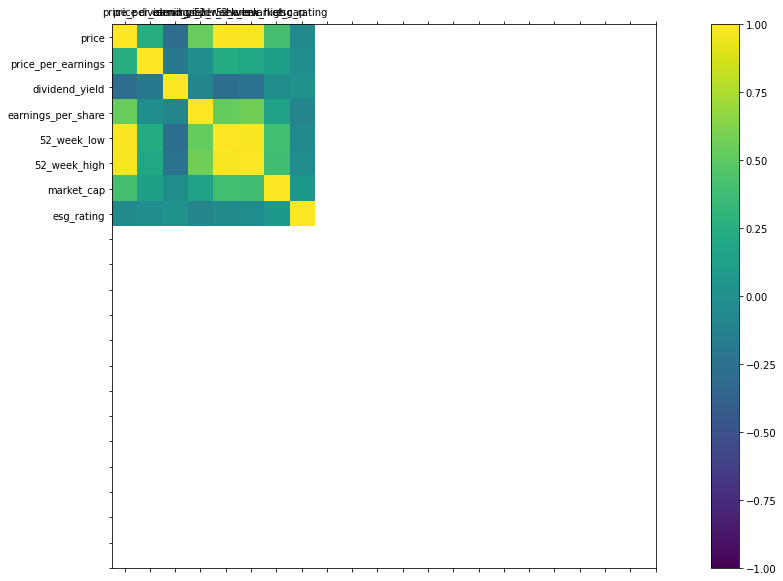

In [117]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(esg.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,22,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
pyplot.show()

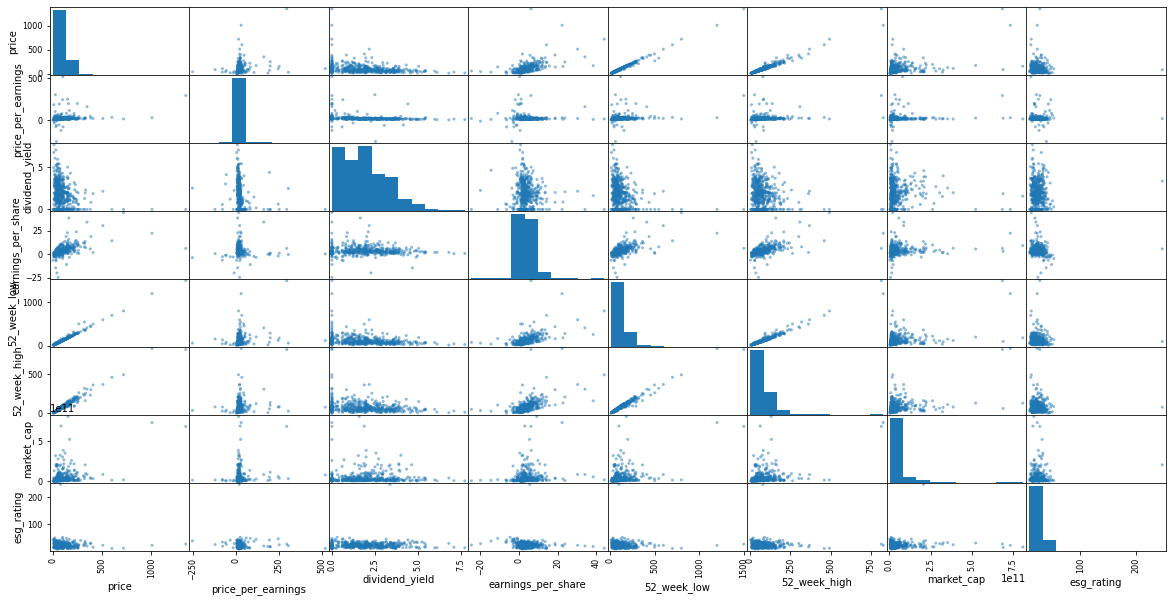

In [177]:
scatter_matrix(esg)
pyplot.show()

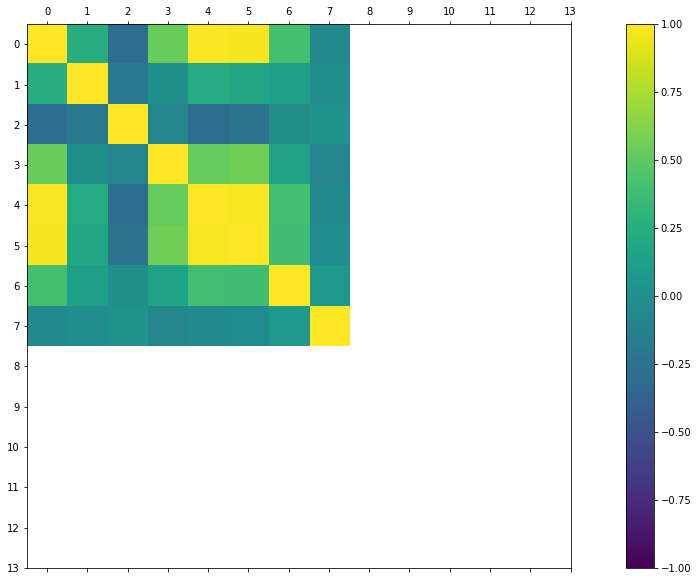

In [178]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(esg.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names)
#ax.set_yticklabels(names)
pyplot.show()

In [179]:
# Split-out validation dataset
array = esg.values
X = array[:,0:7]
Y = array[:,7]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [180]:
num_folds = 10
seed = 7
#scoring = 'neg_mean_squared_error'
scoring = 'neg_mean_squared_log_error'
#scoring = 'explained_variance'
#scoring = 'r2'

In [181]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [182]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.131564 (0.059166)
LASSO: -0.130460 (0.058517)
EN: -0.130642 (0.058722)
KNN: -0.167243 (0.060801)
CART: -0.202100 (0.092443)
SVR: -0.121610 (0.056728)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effe

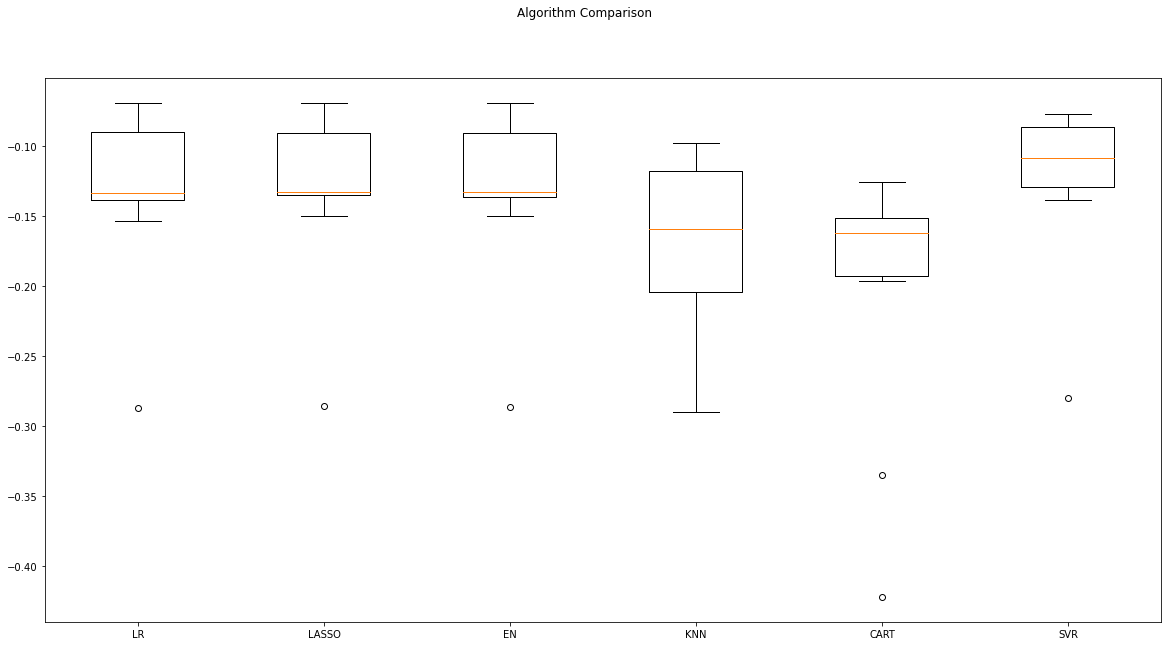

In [183]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [184]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.131564 (0.059166)
ScaledLASSO: -0.124702 (0.056769)
ScaledEN: -0.124072 (0.057279)
ScaledKNN: -0.150709 (0.047480)
ScaledCART: -0.199200 (0.088721)
ScaledSVR: -0.120266 (0.053817)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effe

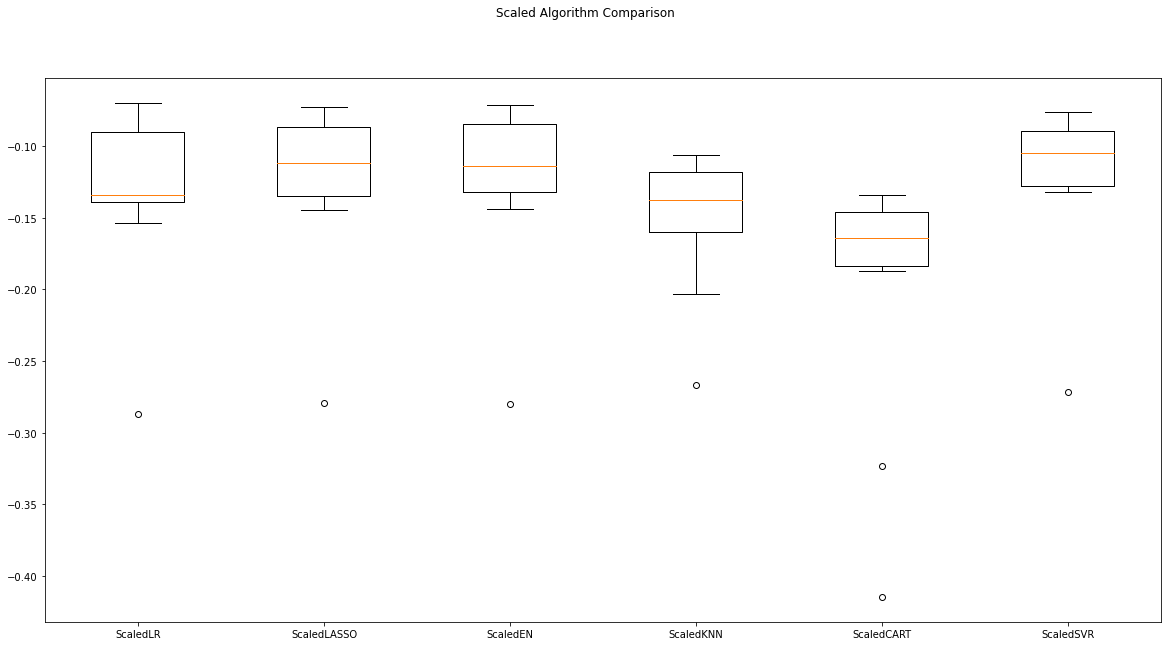

In [185]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [128]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
#model = ElasticNet()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [129]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -202.751835 using {'n_neighbors': 21}
-343.007615 (468.729330) with: {'n_neighbors': 1}
-241.779015 (387.900162) with: {'n_neighbors': 3}
-243.214952 (392.248562) with: {'n_neighbors': 5}
-226.724285 (405.963510) with: {'n_neighbors': 7}
-220.058424 (410.185854) with: {'n_neighbors': 9}
-215.470883 (408.864082) with: {'n_neighbors': 11}
-210.832797 (408.753270) with: {'n_neighbors': 13}
-208.334891 (410.715515) with: {'n_neighbors': 15}
-207.492558 (413.020855) with: {'n_neighbors': 17}
-203.744102 (410.492964) with: {'n_neighbors': 19}
-202.751835 (410.730803) with: {'n_neighbors': 21}


In [186]:
# SVR Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
#param_grid = dict(n_neighbors=k_values)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4]
param_grid = {'C': Cs, 'gamma' : gammas, 'epsilon' : epsilon}
model = SVR(kernel='rbf')
#model = ElasticNet()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [187]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.113072 using {'C': 10, 'epsilon': 1, 'gamma': 0.1}
-0.119528 (0.055350) with: {'C': 0.001, 'epsilon': 0, 'gamma': 0.001}
-0.119527 (0.055353) with: {'C': 0.001, 'epsilon': 0, 'gamma': 0.01}
-0.119529 (0.055356) with: {'C': 0.001, 'epsilon': 0, 'gamma': 0.1}
-0.119528 (0.055341) with: {'C': 0.001, 'epsilon': 0, 'gamma': 1}
-0.119520 (0.055356) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 0.001}
-0.119520 (0.055359) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 0.01}
-0.119523 (0.055361) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 0.1}
-0.119521 (0.055347) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 1}
-0.119515 (0.055379) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 0.001}
-0.119515 (0.055381) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 0.01}
-0.119518 (0.055383) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 0.1}
-0.119514 (0.055368) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 1}
-0.119268 (0.055379) with: {'C': 0.001, 'epsilon': 0.5, 'gamma': 0.001}
-0.119269 (0.055381) with: {'

In [188]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledAB: -0.116915 (0.057084)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledGBM: -0.138047 (0.077149)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledRF: -0.132132 (0.064737)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ScaledET: -0.124714 (0.048114)


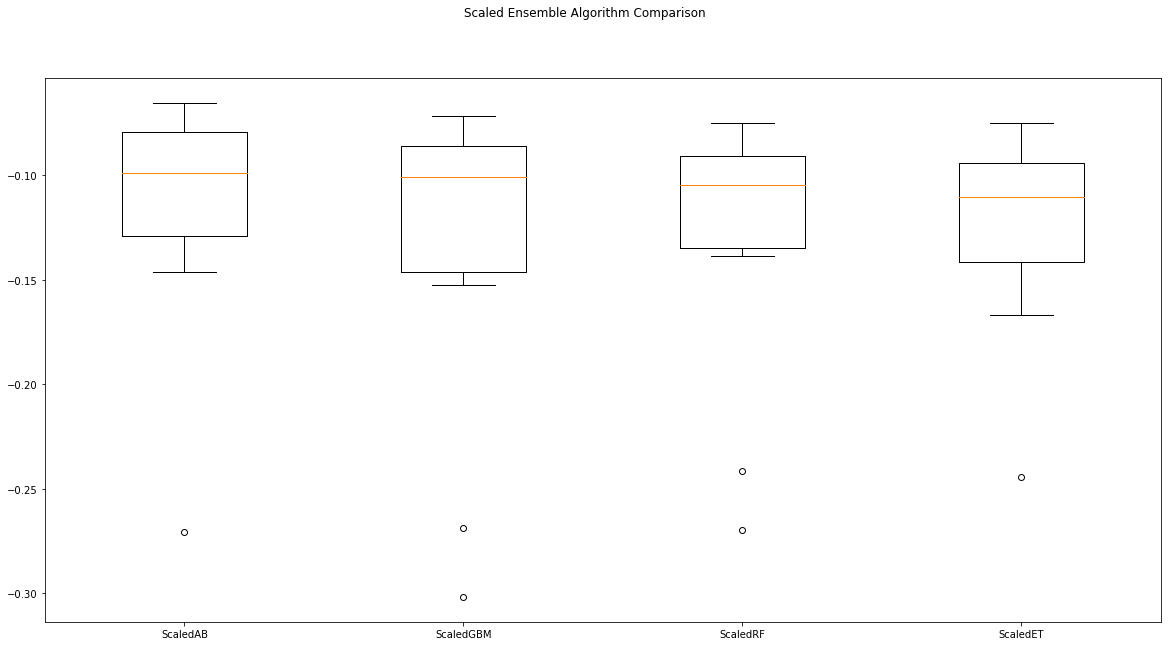

In [189]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [192]:
#Best: -0.113072 using {'C': 10, 'epsilon': 1, 'gamma': 0.1}
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVR(C=10, epsilon=1, gamma=0.1)
model.fit(rescaledX, Y_train)

SVR(C=10, epsilon=1, gamma=0.1)

In [193]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_log_error(Y_validation, predictions))
#print(explained_variance_score(Y_validation, predictions))

0.1044386480225073


In [137]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [139]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -242.990310 using {'n_estimators': 100}
-244.220764 (432.799676) with: {'n_estimators': 50}
-242.990310 (422.449981) with: {'n_estimators': 100}
-245.337333 (421.432272) with: {'n_estimators': 150}
-245.070805 (417.163797) with: {'n_estimators': 200}
-245.703799 (415.557559) with: {'n_estimators': 250}
-246.547862 (414.473951) with: {'n_estimators': 300}
-246.623664 (412.572880) with: {'n_estimators': 350}
-247.045664 (412.271263) with: {'n_estimators': 400}


In [140]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = AdaBoostRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [142]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -193.185075 using {'n_estimators': 100}
-193.889059 (418.343707) with: {'n_estimators': 50}
-193.185075 (417.374363) with: {'n_estimators': 100}
-193.283635 (417.423322) with: {'n_estimators': 150}
-193.644211 (418.096660) with: {'n_estimators': 200}
-193.465492 (417.279200) with: {'n_estimators': 250}
-193.360995 (417.092982) with: {'n_estimators': 300}
-193.390990 (417.084059) with: {'n_estimators': 350}
-193.358071 (417.093853) with: {'n_estimators': 400}


In [161]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(random_state=7)

In [159]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = AdaBoostRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)

AdaBoostRegressor(n_estimators=100, random_state=7)

In [150]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

65.27542135861113


In [157]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(random_state=7)

In [162]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

67.55423422827923


In [163]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_log_error(Y_validation, predictions))

0.11159381841989696


In [ ]:
0.1110990146501608